<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"/><style id="typography.js">html{font-family:sans-serif;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block}audio:not([controls]){display:none;height:0}progress{vertical-align:baseline}[hidden],template{display:none}a{background-color:transparent;-webkit-text-decoration-skip:objects}a:active,a:hover{outline-width:0}abbr[title]{border-bottom:none;text-decoration:underline;text-decoration:underline dotted}b,strong{font-weight:inherit;font-weight:bolder}dfn{font-style:italic}h1{font-size:2em;margin:.67em 0}mark{background-color:#ff0;color:#000}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:
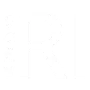
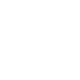
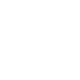

In [3]:
import requests

url = "https://www.rateinflation.com/consumer-price-index/usa-historical-cpi/"

payload = {}
headers = {
  'Referer': 'https://www.google.com/',
  'Upgrade-Insecure-Requests': '1',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
  'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


In [4]:
response = requests.request("GET", url, headers=headers, data=payload)

#print(response.text)
response = response.text

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><style id="typography.js">html{font-family:sans-serif;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block}audio:not([controls]){display:none;height:0}progress{vertical-align:baseline}[hidden],template{display:none}a{background-color:transparent;-webkit-text-decoration-skip:objects}a:active,a:hover{outline-width:0}abbr[title]{border-bottom:none;text-decoration:underline;text-decoration:underline dotted}b,strong{font-weight:inherit;font-weight:bolder}dfn{font-style:italic}h1{font-size:2em;margin:.67em 0}mark{background-color:#ff0;color:#000}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align
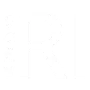
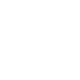
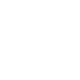

In [19]:
soup = BeautifulSoup(response, 'html.parser')
soup

In [38]:
table = soup.find('table')
table


<table class="css-8rh80p eyyd7td0"><style data-emotion-css="1ctn0ky">.css-1ctn0ky th{padding:7px;text-align:center;text-transform:capitalize;font-weight:bold;}.css-1ctn0ky th:last-child{width:66px;}@media (max-width:639px){.css-1ctn0ky tr{position:absolute;top:-9999px;left:-9999px;}}</style><thead class="css-1ctn0ky eyyd7td1"><tr><th>Year</th><th>jan</th><th>feb</th><th>mar</th><th>apr</th><th>may</th><th>jun</th><th>jul</th><th>aug</th><th>sep</th><th>oct</th><th>nov</th><th>dec</th><th>Annual</th></tr></thead><style data-emotion-css="1rkiavl">.css-1rkiavl tr:nth-of-type(even){background-color:#eee;}.css-1rkiavl td{padding:2px;text-align:center;}.css-1rkiavl td:first-of-type{font-weight:bold;}.css-1rkiavl td:last-child{border-left:1px solid #ccc;}@media (max-width:639px){.css-1rkiavl td{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;text-align:left;-webkit-box-pack:justify;-webkit-justify-content:space-between;-ms-flex-pack:justify;justify-content:space-betw

In [41]:
dados = []
rows = table.find_all('tr')
for row in rows:
    colunas = row.find_all(['th', 'td'])
    colunas = [coluna.text.strip() for coluna in colunas]
    dados.append(colunas)
    


In [75]:
import pandas as pd
from bs4.element import Tag

dados = [elemento.text.strip() for elemento in table.select('td, th')]

df = pd.DataFrame(dados)
df



,0
0,Year
1,jan
2,feb
3,mar
4,apr
...,...
1563,10.000
1564,10.000
1565,10.100
1566,10.000


In [43]:
import pandas as pd

df = pd.DataFrame(dados)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,Annual
1,2023,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,,,
2,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,297.711,296.797,292.655
3,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802,270.970
4,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474,258.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1917,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700,12.825
108,1916,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600,10.883
109,1915,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300,10.108
110,1914,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100,10.017


In [30]:
# Encontrar a tabela na página
table = soup.find('table')

# Extrair dados da tabela
data = []
if table:
    rows = table.find_all('tr')

    for row in rows:
        cols = row.find_all(['th', 'td'])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

# Criar DataFrame do pandas
df = pd.DataFrame(data[1:], columns=data[0])

# Exibir DataFrame
df




<tbody class="css-1rkiavl eyyd7td2"><tr><td>2023</td><td>299.170</td><td>300.840</td><td>301.836</td><td>303.363</td><td>304.127</td><td>305.109</td><td>305.691</td><td>307.026</td><td>307.789</td><td>307.671</td><td></td><td></td><td></td></tr><tr><td>2022</td><td>281.148</td><td>283.716</td><td>287.504</td><td>289.109</td><td>292.296</td><td>296.311</td><td>296.276</td><td>296.171</td><td>296.808</td><td>298.012</td><td>297.711</td><td>296.797</td><td>292.655</td></tr><tr><td>2021</td><td>261.582</td><td>263.014</td><td>264.877</td><td>267.054</td><td>269.195</td><td>271.696</td><td>273.003</td><td>273.567</td><td>274.310</td><td>276.589</td><td>277.948</td><td>278.802</td><td>270.970</td></tr><tr><td>2020</td><td>257.971</td><td>258.678</td><td>258.115</td><td>256.389</td><td>256.394</td><td>257.797</td><td>259.101</td><td>259.918</td><td>260.280</td><td>260.388</td><td>260.229</td><td>260.474</td><td>258.811</td></tr><tr><td>2019</td><td>251.712</td><td>252.776</td><td>254.202</td>